# WEB SCRAPING

## MOBILE WEBSITE SCRAPING
### Website - https://www.bgr.in/gadgets/mobile-phones/search/

In [1]:
# Import all necessary libraries
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd

### DATA WRANGLING

In [2]:
# Specify some basic information

URL = "https://www.bgr.in/gadgets/mobile-phones/search/"   # URL of the website
final_data=[]  # Final result 
pages=15  # Extract data for first 15 pages

In [6]:
# Data Scraping

for page in range (pages):  # Loop that will iterate through every page
    
    r = requests.get(URL)        # Get the content of html page
    
    soup = bts(r.content, 'html5lib')   # Parse the html page
    # If this line causes an error, run 'pip install html5lib'
    
    mobiles=soup.findAll("li",class_='mobile-listing')      # Finds <li> tags of all mobiles on the current page 
       
    for mobile in mobiles:  # Loop that will iterate through every mobile on the page
        
        data={}  # Insert mobile specifications in this dictionary
        
        mobile_url=mobile.find('a')['href']  # Get <a href=" "> link to get URL of page having details of current mobile
        
        mobile_data=requests.get(mobile_url)  # Html content on newly opened page
        
        mobile_data = bts(mobile_data.content, 'html5lib')   # Parse the html page of mobile specification
        
        # Name of the mobile 
        # Html - <h1 itemprop="name">
        name=mobile_data.find('h1',{'itemprop':'name'})
        name=name.get_text() 
        data['Name']=name
        
        # General
        # Html - <span class="col-xs-12 col-sm-5 spec-lbl">
        gen_spec=mobile_data.find_all('span', class_="col-xs-12 col-sm-5 spec-lbl")
        # Html - <span class="col-xs-12 col-sm-7 spec-val">
        gen_val=mobile_data.find_all('span', class_="col-xs-12 col-sm-7 spec-val")
        for spec,val in zip(gen_spec,gen_val):
            data[spec.get_text()]=val.get_text()
        
        # Specifications
        # Html - <span class="col-xs-12 col-sm-5 spec-lbl">
        spec_spec=mobile_data.find_all('span', class_="col-xs-12 col-sm-5 spec-lbl")
        # Html - <span class="col-xs-12 col-sm-7 spec-val">
        spec_val=mobile_data.find_all('span', class_="col-xs-12 col-sm-7 spec-val")
        for spec,val in zip(spec_spec,spec_val):
            data[spec.get_text()]=val.get_text()
        
        # Display 
        # Html - <span class="col-xs-12 col-sm-5 spec-lbl">
        display_spec=mobile_data.find_all('span', class_="col-xs-12 col-sm-5 spec-lbl")
        # Html - <span class="col-xs-12 col-sm-7 spec-val">
        display_val=mobile_data.find_all('span', class_="col-xs-12 col-sm-7 spec-val")
        for spec,val in zip(display_spec,display_val):
            data[spec.get_text()]=val.get_text()
        
        # Camera
        # Html - <span class="col-xs-12 col-sm-5 spec-lbl">
        camera_spec=mobile_data.find_all('span', class_="col-xs-12 col-sm-5 spec-lbl")
        # Html - <span class="col-xs-12 col-sm-7 spec-val">
        camera_val=mobile_data.find_all('span', class_="col-xs-12 col-sm-7 spec-val")
        for spec,val in zip(camera_spec,camera_val):
            data[spec.get_text()]=val.get_text()
        
        # Battery Capacity
        # Html - <span class="col-xs-12 col-sm-7 spec-val">
        battery=mobile_data.find('span', class_="col-xs-12 col-sm-7 spec-val")
        battery=battery.get_text()
        data['Battery']=battery
        
        # Security
        # Html - <span class="col-xs-12 col-sm-5 spec-lbl">
        security_spec=mobile_data.find_all('span', class_="col-xs-12 col-sm-5 spec-lbl")
        # Html - <span class="col-xs-12 col-sm-7 spec-val">
        security_val=mobile_data.find_all('span', class_="col-xs-12 col-sm-7 spec-val")
        for spec,val in zip(security_spec,security_val):
            data[spec.get_text()]=val.get_text()
        
        # Price of the mobile
        # Html - <span class="rsm">
        #        <meta itemprop="priceCurrency" content="INR">
        #        <i itemprop="price" class="rs" content="17999"></i> 17,999</span>
        price=mobile_data.find('span', class_='rsm')
        price=price.get_text()
        data['Price']=price
        
        # Storing in 'final_data' list
        final_data.append(data)                            
        
    # Url for moving to next page
    # Html - <a class="pagination" href="https://www.bgr.in/gadgets/mobile-phones/search//page/2">2</a>
    URL=soup.find('a',class_='pagination')['href']            

In [7]:
# Converting final_data to a data frame
df=pd.DataFrame(final_data)
df

,Name,Sim Capability,Input Mechanism,Internal Memory,Internal Storage,Display Size,Device Type,Availability,Software,Processor,...,Fast Charging,Wireless Charging,Network Type,Network Capability,Fingerprint Sensor,Face Unlock,Battery,Price,IP Rating,SD Card Capacity
0,Realme 8i,Dual-SIM,Touchscreen,4GB,64GB,6.60-inch,Smartphone,Available In India,realme UI 2.0 Based on Android 11,MediaTek Helio G96,...,Yes,No,GSM,"2G, 3G, 4G",Side-Mounted,Yes,Smartphone,"13,999",NaN,NaN
1,Realme 8s 5G,Dual-SIM,Touchscreen,6GB,128GB,6.5 inch,Smartphone,Available In India,realme UI 2.0 Based on Android 11,MediaTek Dimensity 810 5G,...,Yes,No,GSM,"2G, 3G, 4G, 5G",Side-Mounted,Yes,Smartphone,"17,999",NaN,NaN
2,Xiaomi Redmi 10 Prime,Dual-SIM,Touchscreen,4GB,64GB,6.5 inch,Smartphone,Available In India,MIUI 12.5 based on Android 11,MediaTek Helio G88,...,Yes,No,GSM,"2G, 3G, 4G",Side-Mounted,Yes,Smartphone,"12,499",NaN,NaN
3,Samsung Galaxy A52s 5G,Dual-SIM,Touchscreen,6GB,128GB,6.50-inch,Smartphone,Available In India,Android 11,Qualcomm Snapdragon 778G,...,Yes,No,GSM,"2G, 3G, 4G",Under-Display,Yes,Smartphone,"35,999",NaN,NaN
4,Samsung Galaxy M32 5G,Dual-SIM,Touchscreen,6GB,128GB,6.50-inch,Smartphone,Available In India,Android 11,MediaTek Dimensity 720,...,Yes,No,GSM,"2G, 3G, 4G, 5G",Side-Mounted,Yes,Smartphone,"20,999",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Nokia C20 Plus,Dual-SIM,Touchscreen,2GB,32 GB,6.5-inch,Smartphone,Available In India,Android 11,Unisoc SC9863a SoC,...,Yes,No,GSM,"2G, 3G, 4G",N/A,Yes,Smartphone,"8,999",NaN,NaN
296,Vivo Y53s,Dual-SIM,Touchscreen,8GB,128GB,6.58 inch,Smartphone,Available In India,Android 11,Qualcomm Snapdragon 480,...,Yes,No,GSM,"2G, 3G, 4G",Side-Mounted,Yes,Smartphone,"19,490",NaN,NaN
297,Tecno Pova 2,Dual-SIM,Touchscreen,4GB,64GB,6.95-inch,Smartphone,Available In India,Android 11,MediaTek Helio G85,...,Yes,No,GSM,"2G, 3G, 4G",Side-Mounted,Yes,Smartphone,"10,999",NaN,NaN
298,Infinix Smart 5A,Dual-SIM,Touchscreen,2 GB,32 GB,6.52 inch,Smartphone,Available In India,Android 11,MediaTek Helio A20,...,Yes,No,GSM,"2G, 3G, 4G",Rear-Mounted,No,Smartphone,"6,499",NaN,256 GB


In [8]:
# All extracted column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     300 non-null    object
 1   Sim Capability           300 non-null    object
 2   Input Mechanism          300 non-null    object
 3   Internal Memory          300 non-null    object
 4   Internal Storage         300 non-null    object
 5   Display Size             300 non-null    object
 6   Device Type              300 non-null    object
 7   Availability             300 non-null    object
 8   Software                 300 non-null    object
 9   Processor                300 non-null    object
 10  Dedicated Micro SD Card  300 non-null    object
 11  3.5 mm Jack              285 non-null    object
 12  Display Technology       300 non-null    object
 13  Display Resolution       300 non-null    object
 14  Main Camera              300 non-null    o

In [13]:
# Remove unwanted columns
df.drop(['Device Type','Software','Processor','Dedicated Micro SD Card','3.5 mm Jack','Display Technology','Display Resolution','USB Type','Fast Charging','Wireless Charging','Network Type','Battery','IP Rating','SD Card Capacity'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     300 non-null    object
 1   Sim Capability           300 non-null    object
 2   Input Mechanism          300 non-null    object
 3   Internal Memory          300 non-null    object
 4   Internal Storage         300 non-null    object
 5   Display Size             300 non-null    object
 6   Availability             300 non-null    object
 7   Main Camera              300 non-null    object
 8   Main Camera resolution   300 non-null    object
 9   Front Camera             300 non-null    object
 10  Front Camera Resolution  300 non-null    object
 11  Battery Capacity         300 non-null    object
 12  Network Capability       300 non-null    object
 13  Fingerprint Sensor       300 non-null    object
 14  Face Unlock              300 non-null    o

In [33]:
# Replace null values
df.fillna('None',inplace=True)

In [34]:
# First 5 entries
df.head()

,Name,Sim Capability,Input Mechanism,Internal Memory,Internal Storage,Display Size,Availability,Main Camera,Main Camera resolution,Front Camera,Front Camera Resolution,Battery Capacity,Network Capability,Fingerprint Sensor,Face Unlock,Price
0,Realme 8i,Dual-SIM,Touchscreen,4GB,64GB,6.60-inch,Available In India,Triple Camera,50MP + 2MP + 2MP,Single Camera,16MP,5000mAh,"2G, 3G, 4G",Side-Mounted,Yes,"13,999"
1,Realme 8s 5G,Dual-SIM,Touchscreen,6GB,128GB,6.5 inch,Available In India,Triple Camera,64MP + 2MP + 2MP,Single Camera,16MP,5000mAh,"2G, 3G, 4G, 5G",Side-Mounted,Yes,"17,999"
2,Xiaomi Redmi 10 Prime,Dual-SIM,Touchscreen,4GB,64GB,6.5 inch,Available In India,Quad Camera,50MP+8MP+2MP+2MP,Single Camera,8MP,6000mAh,"2G, 3G, 4G",Side-Mounted,Yes,"12,499"
3,Samsung Galaxy A52s 5G,Dual-SIM,Touchscreen,6GB,128GB,6.50-inch,Available In India,Quad Camera,64MP + 12MP + 5MP + 5MP,Single Camera,32MP,4500mAh,"2G, 3G, 4G",Under-Display,Yes,"35,999"
4,Samsung Galaxy M32 5G,Dual-SIM,Touchscreen,6GB,128GB,6.50-inch,Available In India,Quad Camera,48MP + 8MP + 2MP + 2MP,Single Camera,13MP,5000mAh,"2G, 3G, 4G, 5G",Side-Mounted,Yes,"20,999"


In [35]:
# Last 5 entries
df.tail()

,Name,Sim Capability,Input Mechanism,Internal Memory,Internal Storage,Display Size,Availability,Main Camera,Main Camera resolution,Front Camera,Front Camera Resolution,Battery Capacity,Network Capability,Fingerprint Sensor,Face Unlock,Price
295,Nokia C20 Plus,Dual-SIM,Touchscreen,2GB,32 GB,6.5-inch,Available In India,Dual Camera,8MP+2MP,Single Camera,5MP,"4,950mAh","2G, 3G, 4G",N/A,Yes,"8,999"
296,Vivo Y53s,Dual-SIM,Touchscreen,8GB,128GB,6.58 inch,Available In India,Triple Camera,64MP+2MP+2MP,Single Camera,16MP,5000mAh,"2G, 3G, 4G",Side-Mounted,Yes,"19,490"
297,Tecno Pova 2,Dual-SIM,Touchscreen,4GB,64GB,6.95-inch,Available In India,Quad Camera,48MP+2MP+2MP+Depth Sensor,Single Camera,8MP,"7,000mAh","2G, 3G, 4G",Side-Mounted,Yes,"10,999"
298,Infinix Smart 5A,Dual-SIM,Touchscreen,2 GB,32 GB,6.52 inch,Available In India,Dual Camera,8MP + Depth Sensor,Single Camera,8MP,5000 mAh,"2G, 3G, 4G",Rear-Mounted,No,"6,499"
299,Micromax In 2b,Dual-SIM,Touchscreen,4GB,64GB,6.52 inch,Available In India,Dual Camera,13MP+2MP,Single Camera,5MP,"5,000mAh","2G, 3G, 4G",Rear-Mounted,Yes,"8,999"


### DATA VISUALIZATION

In [36]:
# Import necessary libraraies
from matplotlib import pyplot as plt
import seaborn as sns

In [37]:
def frequency(df,column):
    plt.figure(figsize=(15,5))
    plt.grid()
    sns.countplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.xticks(rotation=90)
    plt.show()

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


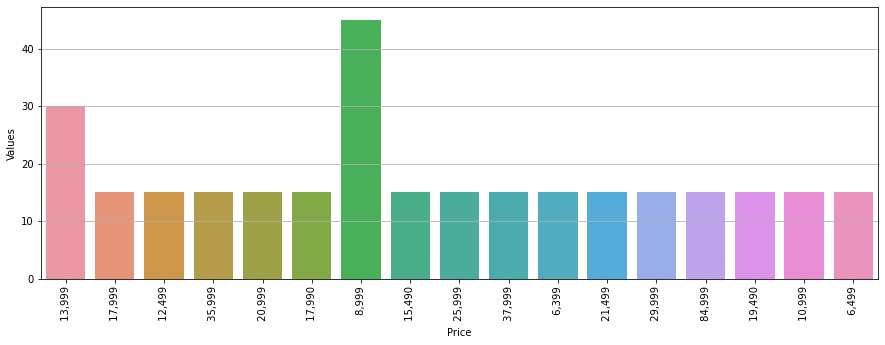

In [38]:
# Price of mobiles v/s frequency
frequency(df,'Price')

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


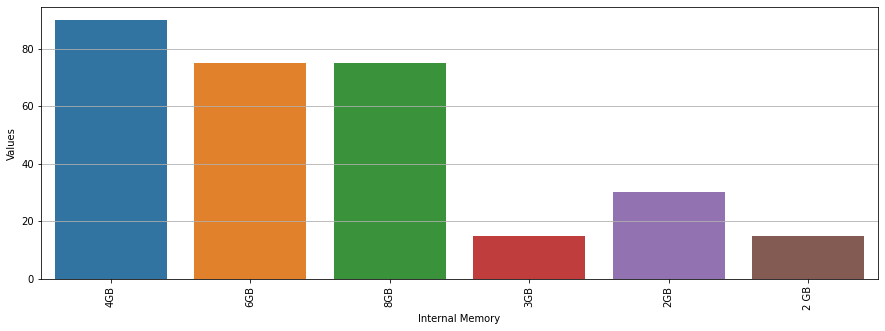

In [39]:
# Internal Memory of mobiles v/s frequency
frequency(df,'Internal Memory')

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


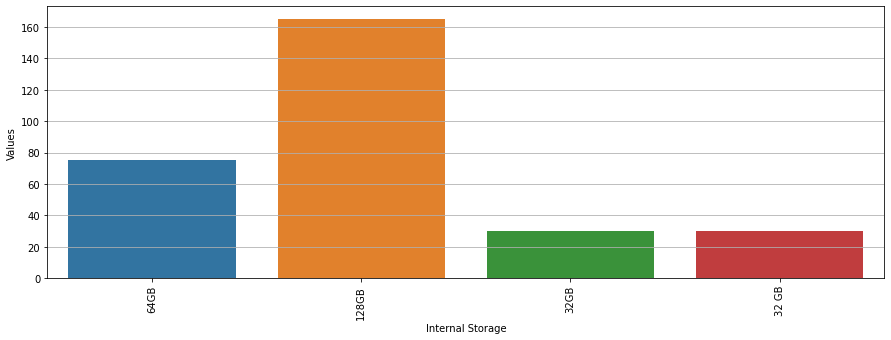

In [40]:
# Internal Storage of mobiles v/s frequency
frequency(df,'Internal Storage')

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


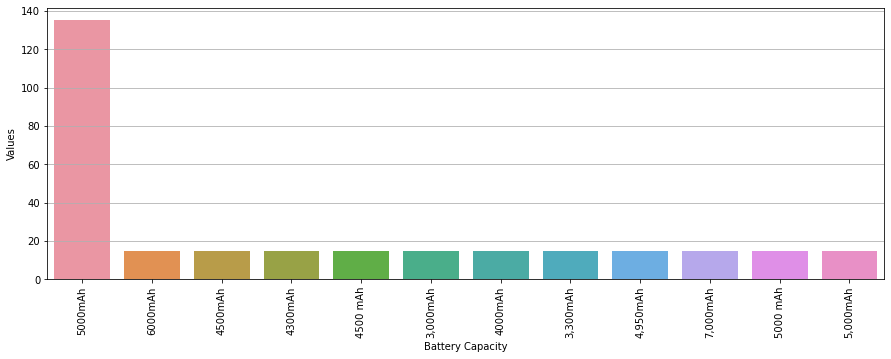

In [41]:
# Battery Capacity of mobiles v/s frequency
frequency(df,'Battery Capacity')